# Lending Club Loan Analytics


The purpose of this exercise is to:

> Analyse the loan repository by lending club

> Understand the differences between fully paid and charged off loans, and running predictive models on them

> Classifying current and late loans as potentially being fully paid or charged off

> Building on top of classification and Predicting the actual losses incurred by classifying current and late loans as being fully paid or charged off

## Data Exploration and Cleaning 

In [1]:
# importing basic functions and packages
from __future__ import division, print_function, unicode_literals
import numpy as np
import scipy as sp
import pandas as pd
import os
np.random.seed(42)

In [2]:
# reading in the complete dataframe
full= pd.read_csv("C:\loan.csv", low_memory=False)
print(full.shape)


(887379, 74)


In [3]:
# removing all unneeded variables
full= full.drop(['annual_inc_joint','application_type','collection_recovery_fee','dti_joint','initial_list_status','issue_d',
                'last_credit_pull_d','last_pymnt_d','next_pymnt_d','out_prncp','out_prncp_inv','policy_code','recoveries',
                'title','total_pymnt_inv','url','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                 'open_il_24m', 'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                 'all_util','inq_fi', 'total_cu_tl','inq_last_12m','addr_state','zip_code','emp_title','member_id','loan_amnt',
                'grade','desc','id','funded_amnt_inv','pymnt_plan','mths_since_last_record','total_pymnt','total_rec_prncp',
                'total_rec_int','last_pymnt_amnt','earliest_cr_line','mths_since_last_delinq','mths_since_last_major_derog'],
                axis = 1)
print(full.shape)
full.head()

(887379, 25)


,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.0,13648.0,83.7,9.0,0.00,0.0,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0.0,1687.0,9.4,4.0,0.00,0.0,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.0,2956.0,98.5,10.0,0.00,0.0,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.0,5598.0,21.0,37.0,16.97,0.0,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Current,...,0.0,27783.0,53.9,38.0,0.00,0.0,0.0,NaN,NaN,NaN


In [4]:
#printing types
print(full.dtypes)

funded_amnt                   float64
term                           object
int_rate                      float64
installment                   float64
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
purpose                        object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
total_rec_late_fee            float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi_lim              float64
dtype: object


In [5]:
# converting text - based variables into categorical
term_dic= dict(zip(list(set(full.term)),[1,0]))
full['term']= full['term'].map(term_dic)

hown_dic= dict(zip(list(set(full.home_ownership)),[4,2,3,1,0,5]))
full['home_ownership']= full['home_ownership'].map(hown_dic)

vs_dic= dict(zip(list(set(full.verification_status)),[0,2,1]))
full['verification_status']= full['verification_status'].map(vs_dic)

sg_dic= dict(zip(list(set(full.sub_grade)),[26,34,11,24,12,1,14,32,15,9,30,19,10,33,20,22,17,16,18,29,13,35,3,2,6,4,8,25,27,28,
                                            23,21,31,5,7]))
full['sub_grade']= full['sub_grade'].map(sg_dic)

empl_dic= dict(zip(list(set(full.emp_length)),[4,8,5,0,7,1,11,9,10,6,2,3]))
full['emp_length']= full['emp_length'].map(empl_dic)

purp_dic= dict(zip(list(set(full.purpose)),list(range(0,14))))
full['purpose']= full['purpose'].map(purp_dic)


Printing out a sample of the original dataset to analyse it, since the original is too computationally intensive for prototyping

In [6]:
full_small = full
full_small.shape

(887379, 25)

### Transforming variables

In [95]:
# transforming variables for better fit
full_small.annual_inc= np.log(full_small.annual_inc + 1)
full_small.delinq_2yrs= np.sqrt(full_small.delinq_2yrs)
full_small.open_acc= np.sqrt(full_small.open_acc)
full_small.revol_bal= full_small.revol_bal + 1
full_small.revol_bal= np.log(full_small.revol_bal)
full_small.tot_coll_amt= full_small.tot_coll_amt + 1
full_small.tot_coll_amt= np.log(full_small.tot_coll_amt)
full_small.tot_cur_bal= full_small.tot_cur_bal + 1
full_small.tot_cur_bal= np.log(full_small.tot_cur_bal)
full_small.total_rev_hi_lim= full_small.total_rev_hi_lim + 1
full_small.total_rev_hi_lim= np.log(full_small.total_rev_hi_lim)

Extracting out 'Fully Paid' and "Charged" off loans only. These are our primary types for model building. We will use them to analyse the difference between fully paid and charged off loans, and extrapolate to our other categories, to analyse the possibility of them being Charged off (vs Fully paid)

In [8]:
# analysing all the possible loan_status
print(list(set(full.loan_status)))

['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Current', 'Late (16-30 days)', 'In Grace Period', 'Late (31-120 days)', 'Issued', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']


In [9]:
#extracting only the 'Fully Paid" and "Charged Off" Loans
df= full_small[(full_small.loan_status == 'Fully Paid') | (full_small.loan_status == 'Charged Off')]
df= df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189143 entries, 42538 to 887371
Data columns (total 25 columns):
funded_amnt                   189143 non-null float64
term                          189143 non-null int64
int_rate                      189143 non-null float64
installment                   189143 non-null float64
sub_grade                     189143 non-null int64
emp_length                    189143 non-null int64
home_ownership                189143 non-null int64
annual_inc                    189143 non-null float64
verification_status           189143 non-null int64
loan_status                   189143 non-null object
purpose                       189143 non-null int64
dti                           189143 non-null float64
delinq_2yrs                   189143 non-null float64
inq_last_6mths                189143 non-null float64
open_acc                      189143 non-null float64
pub_rec                       189143 non-null float64
revol_bal                     1891

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,12000.0,0,13.53,407.40,26,1,5,10.596635,1,Fully Paid,...,2.0,8.625689,68.8,32.0,0.0,0.0,0.0,9.641278,9.518266,8.999743
42544,3000.0,0,12.85,100.87,32,1,5,10.126631,2,Fully Paid,...,2.0,7.964156,54.2,26.0,0.0,0.0,0.0,5.043425,9.879758,8.575651
42546,28000.0,0,7.62,872.52,14,5,0,12.691580,1,Fully Paid,...,0.0,10.294921,54.6,31.0,0.0,0.0,0.0,0.000000,13.591858,10.900455
42549,24000.0,0,13.53,814.80,26,1,0,11.512925,2,Fully Paid,...,0.0,9.981282,76.7,39.0,0.0,0.0,0.0,6.291569,12.205247,10.247113
42552,15000.0,0,14.47,516.10,1,1,5,11.492723,0,Fully Paid,...,0.0,8.656955,22.3,16.0,0.0,0.0,0.0,0.000000,9.475700,10.158169


### Exploring Relationships between variables

In [10]:
# importing the needed modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#changing loan_status to binary values, 0 = Fully Paid, 1 = Charged Off
df.loan_status.replace('Fully Paid', 0,inplace=True)
df.loan_status.replace('Charged Off', 1,inplace=True)

df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,12000.0,0,13.53,407.40,26,1,5,10.596635,1,0,...,2.0,8.625689,68.8,32.0,0.0,0.0,0.0,9.641278,9.518266,8.999743
42544,3000.0,0,12.85,100.87,32,1,5,10.126631,2,0,...,2.0,7.964156,54.2,26.0,0.0,0.0,0.0,5.043425,9.879758,8.575651
42546,28000.0,0,7.62,872.52,14,5,0,12.691580,1,0,...,0.0,10.294921,54.6,31.0,0.0,0.0,0.0,0.000000,13.591858,10.900455
42549,24000.0,0,13.53,814.80,26,1,0,11.512925,2,0,...,0.0,9.981282,76.7,39.0,0.0,0.0,0.0,6.291569,12.205247,10.247113
42552,15000.0,0,14.47,516.10,1,1,5,11.492723,0,0,...,0.0,8.656955,22.3,16.0,0.0,0.0,0.0,0.000000,9.475700,10.158169


In [12]:
# summary statistics

df.describe()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,...,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000,189143.000000
mean,14191.396853,0.233776,14.252342,439.028481,18.584600,4.668098,2.076709,11.072373,1.067251,0.186134,...,0.176475,9.234013,55.114265,25.937788,0.564821,0.008993,0.004161,0.679743,11.190426,9.994245
std,8210.613165,0.423232,4.434634,246.849669,10.611526,3.618968,2.389365,0.507434,0.831885,0.389216,...,0.484310,1.090229,23.808537,11.788454,4.872340,0.102823,0.069960,1.948005,1.282270,0.786821
min,1000.000000,0.000000,5.320000,27.850000,1.000000,0.000000,0.000000,8.006368,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.615121
25%,8000.000000,0.000000,11.140000,262.280000,8.000000,1.000000,0.000000,10.731166,0.000000,0.000000,...,0.000000,8.739857,37.800000,17.000000,0.000000,0.000000,0.000000,0.000000,10.253105,9.495594
50%,12000.000000,0.000000,14.090000,385.330000,19.000000,4.000000,0.000000,11.068200,1.000000,0.000000,...,0.000000,9.332912,56.200000,24.000000,0.000000,0.000000,0.000000,0.000000,11.302019,10.012387
75%,19750.000000,0.000000,17.270000,573.700000,27.000000,8.000000,5.000000,11.407565,2.000000,0.000000,...,0.000000,9.881549,73.700000,33.000000,0.000000,0.000000,0.000000,0.000000,12.246326,10.513280
max,35000.000000,1.000000,28.990000,1424.570000,35.000000,11.000000,5.000000,15.979590,2.000000,1.000000,...,15.000000,14.373249,892.300000,150.000000,358.680000,6.000000,5.000000,16.029543,15.894962,14.515203


In [13]:
df.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,12000.0,0,13.53,407.40,26,1,5,10.596635,1,0,...,2.0,8.625689,68.8,32.0,0.0,0.0,0.0,9.641278,9.518266,8.999743
42544,3000.0,0,12.85,100.87,32,1,5,10.126631,2,0,...,2.0,7.964156,54.2,26.0,0.0,0.0,0.0,5.043425,9.879758,8.575651
42546,28000.0,0,7.62,872.52,14,5,0,12.691580,1,0,...,0.0,10.294921,54.6,31.0,0.0,0.0,0.0,0.000000,13.591858,10.900455
42549,24000.0,0,13.53,814.80,26,1,0,11.512925,2,0,...,0.0,9.981282,76.7,39.0,0.0,0.0,0.0,6.291569,12.205247,10.247113
42552,15000.0,0,14.47,516.10,1,1,5,11.492723,0,0,...,0.0,8.656955,22.3,16.0,0.0,0.0,0.0,0.000000,9.475700,10.158169


,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
funded_amnt,1.000000,0.414291,0.153473,0.956549,0.024774,-0.058414,-0.183471,0.509894,0.338842,0.047030,...,-0.103491,0.378654,0.104202,0.210482,0.058497,-0.009385,0.010574,-0.070196,0.338661,0.436296
term,0.414291,1.000000,0.454786,0.177716,0.059229,-0.041696,-0.103695,0.136621,0.252088,0.138546,...,-0.026985,0.126314,0.062754,0.097778,0.017955,0.004902,0.010181,-0.020964,0.159416,0.129610
int_rate,0.153473,0.454786,1.000000,0.139607,0.151492,-0.004025,0.088187,-0.093097,0.228116,0.240414,...,0.059484,0.010983,0.294087,-0.049451,0.059990,0.022698,0.030406,0.033253,-0.098504,-0.209345
installment,0.956549,0.177716,0.139607,1.000000,0.024375,-0.049734,-0.152397,0.493959,0.313847,0.036828,...,-0.093725,0.368485,0.128404,0.190531,0.066767,-0.007967,0.013218,-0.064112,0.300685,0.402506
sub_grade,0.024774,0.059229,0.151492,0.024375,1.000000,-0.001520,0.013048,-0.013413,0.033100,0.033552,...,0.017913,0.003076,0.053572,-0.004127,0.009164,0.004529,0.009051,0.012205,-0.014591,-0.037569
emp_length,-0.058414,-0.041696,-0.004025,-0.049734,-0.001520,1.000000,0.173744,-0.058387,-0.100419,0.006831,...,-0.043502,-0.078077,-0.021024,-0.090096,0.000470,-0.003786,-0.007994,-0.009062,-0.076910,-0.081241
home_ownership,-0.183471,-0.103695,0.088187,-0.152397,0.013048,0.173744,1.000000,-0.238753,-0.086119,0.064505,...,0.006349,-0.153410,0.000007,-0.208329,-0.000719,0.000657,-0.012410,-0.014160,-0.580107,-0.207990
annual_inc,0.509894,0.136621,-0.093097,0.493959,-0.013413,-0.058387,-0.238753,1.000000,0.117868,-0.103207,...,-0.038162,0.304240,0.054265,0.307792,0.019249,0.004824,0.022593,-0.024958,0.507248,0.388463
verification_status,0.338842,0.252088,0.228116,0.313847,0.033100,-0.100419,-0.086119,0.117868,1.000000,0.070743,...,0.051549,0.116352,0.058164,0.110294,0.023509,0.016973,0.017721,-0.019674,0.123043,0.131953
loan_status,0.047030,0.138546,0.240414,0.036828,0.033552,0.006831,0.064505,-0.103207,0.070743,1.000000,...,-0.008834,0.011867,0.094428,-0.044157,0.156954,0.006392,0.005924,0.003485,-0.061014,-0.057949


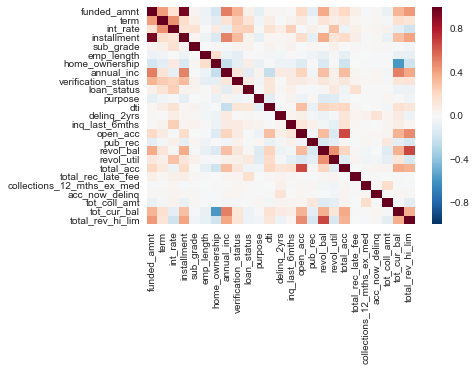

In [14]:
#plotting relationships between the variables (correlations and a correlation heatmap)
plt.plot(10,10)
sns.heatmap(df.corr())
df.corr()

# Classification

## Modelling

## Setting the target,  seed, and train_test split for subsequent models

In [15]:
#setting the target, and data
df_data = df.drop(['loan_status'] ,axis=1)
df_target = df['loan_status']

X = df_data
y = df_target
print(X.columns)
X.head()

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_late_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42538,12000.0,0,13.53,407.40,26,1,5,10.596635,1,2,...,2.0,8.625689,68.8,32.0,0.0,0.0,0.0,9.641278,9.518266,8.999743
42544,3000.0,0,12.85,100.87,32,1,5,10.126631,2,2,...,2.0,7.964156,54.2,26.0,0.0,0.0,0.0,5.043425,9.879758,8.575651
42546,28000.0,0,7.62,872.52,14,5,0,12.691580,1,2,...,0.0,10.294921,54.6,31.0,0.0,0.0,0.0,0.000000,13.591858,10.900455
42549,24000.0,0,13.53,814.80,26,1,0,11.512925,2,5,...,0.0,9.981282,76.7,39.0,0.0,0.0,0.0,6.291569,12.205247,10.247113
42552,15000.0,0,14.47,516.10,1,1,5,11.492723,0,2,...,0.0,8.656955,22.3,16.0,0.0,0.0,0.0,0.000000,9.475700,10.158169


In [16]:
# importing the necessary packages for splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data , df_target, random_state=42, test_size = 0.3)

## Deciding which Model to use

Since we have two types of loan statuses as our target variable, we will be using a classification technique to predict the possibility of a loan being either fully paid or charged off.

We will be using Decision Trees, KNN and Logistic Regression for classification. The whole process involves:
> An exhaustive grid search 

> Feature selection

> Learning Curves

> ROC Curve

> Evaluation on multiple parameters, e.g F1 score, accuracy, precision, recall

to enable us to select the best classification technique

### Setting the Evaluation Metric

In [17]:
eval_metric = 'accuracy'

### Building a Decision Tree

### Using Grid Search-Cross Validation to search for the best Decision Tree hyperparameters / inputs

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


gs_dtree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                              'min_samples_split':[2,3,4,5,6,7,8,9,10]}],
                  scoring=eval_metric,
                  cv=10,
                  n_jobs=4)

gs_dtree = gs_dtree.fit(X_train, y_train)
print(gs_dtree.best_score_)
print(gs_dtree.best_params_)

### Fitting the optimized Tree on the data, and visualizing it

Tree Visualization

Pydot package used with graphviz export functions to render the tree directly in the notebook.

### Decision Tree Evaluation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
import itertools
import sklearn


#Refitting the decision tree on the test and training datasets.
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth= 3, min_samples_split= 2, min_samples_leaf= 7, random_state=42)
y_pred = dtree.fit(X_train, y_train).predict(X_test)

#confusion Matrix
print('The confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test, y_pred))


# classification metrics for out of sample performance
print(sklearn.metrics.classification_report(y_test, y_pred))

# Accuracy
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score : ', f1_score(y_test, y_pred, average='macro'))

The confusion Matrix
[[45830   349]
 [ 9789   775]]
             precision    recall  f1-score   support

          0       0.82      0.99      0.90     46179
          1       0.69      0.07      0.13     10564

avg / total       0.80      0.82      0.76     56743

Accuracy : 0.82
F1 score :  0.516512632303


## Fitting a KNN Classification Model

### Importing libraries and standardizing the features

In [19]:
#importing the necessary libraries 
from sklearn import neighbors, datasets


# standardizing the features
sc = sklearn.preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Using Grid Search-Cross Validation to find the best hyperparameter combination

In [ ]:
#Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                               metric='minkowski'),
                      param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
                                   'weights':['uniform','distance']}],
                      scoring=eval_metric,
                      cv=10,
                      n_jobs=4)
gs_knn = gs_knn.fit(X_train_std, y_train)          
print(gs_knn.best_score_)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)

### KNN Model Evaluation and Feature Selection

#### Fitting the base model

In [20]:
#building and fitting the classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=25, 
                           p=2, weights = 'distance',
                           metric='minkowski')

knn = knn.fit(X_train_std, y_train)

In [21]:
import sklearn
from sklearn.metrics import cohen_kappa_score
#using the base model for predictions, insample and out of sample

y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)


#confusion Matrix
print('The confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

# classification metrics for out of sample performance
print(sklearn.metrics.classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))



The confusion Matrix
[[45553   626]
 [ 9656   908]]
             precision    recall  f1-score   support

          0       0.83      0.99      0.90     46179
          1       0.59      0.09      0.15     10564

avg / total       0.78      0.82      0.76     56743

Accuracy (out-of-sample): 0.82
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.524347529917
F1 score (in-sample)    :  1.0
Kappa score (out-of-sample):  0.10799351458
Kappa score (in-sample)    :  1.0


## Feature Selection for KNN Using K - Best

## Fitting a Logistic Regression Model

### Using Grid Search-Cross Validation to find the best hyperparameter combination

In [ ]:
from sklearn.linear_model import LogisticRegression

#Choosing C parameter for Logistic Regression AND type of penalty
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring=eval_metric,
                  cv=10)

gs_lr = gs_lr.fit(X_train, y_train)
print(gs_lr.best_score_)
print(gs_lr.best_params_)

### Building the Logistic Regression Model

In [22]:
#importing the required libraries
from sklearn import linear_model

#creating the Logit classifier and training the model
logit = linear_model.LogisticRegression(random_state= 42,C=100,penalty = 'l2')
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

### Logistic Regression Evaluation

In [23]:
#confusion Matrix
print('The confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

# classification metrics for out of sample performance
print(sklearn.metrics.classification_report(y_test, y_pred))

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

The confusion Matrix
[[45700   479]
 [ 9771   793]]
             precision    recall  f1-score   support

          0       0.82      0.99      0.90     46179
          1       0.62      0.08      0.13     10564

avg / total       0.79      0.82      0.76     56743

Accuracy (out-of-sample): 0.82
F1 score (out-of-sample):  0.516580884816


Analyzing the features

## Selecting the best Classification Model

### Plotting the ROC Curve

10-fold cross validation:

ROC AUC: 0.69 (+/- 0.01) [Decision Tree]
ROC AUC: 0.65 (+/- 0.01) [KNN]
ROC AUC: 0.71 (+/- 0.00) [Logistic Regression]


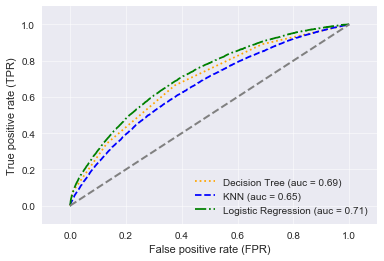

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score


# dtree is the decision tree model
# knn is the knn model
# logit is the logistic regression model


clf_labels = ['Decision Tree', 'KNN', 'Logistic Regression']
all_clf = [dtree, knn, logit]

print('10-fold cross validation:\n')
for clf, label in zip([dtree, knn, logit], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

### Nested Cross Validation for Decision Tree, KNN and Logistic Regression

In [27]:
from sklearn.model_selection import cross_val_score

np.random.seed(101)

# 10 folds are used for cv
#Nested cross validation for the decision tree
scores=cross_val_score(dtree, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy for the Decision Tree: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

#Nested cross validation for the KNN Model
scores=cross_val_score(knn, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy for the KNN Model: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

#Nested cross validation for the Logistic Regression
scores=cross_val_score(logit, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy for the Logistic Regression: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy for the Decision Tree: 0.821 +/- 0.001
CV accuracy for the KNN Model: 0.813 +/- 0.001
CV accuracy for the Logistic Regression: 0.820 +/- 0.001


### Plotting Learning Curves for all 3 Models

In [28]:
#creating the learning curve plot and function


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

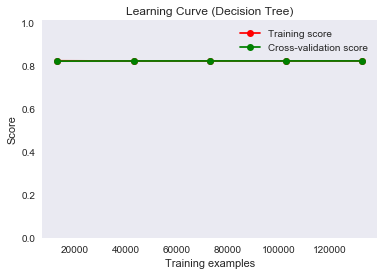

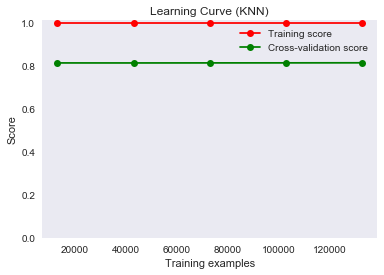

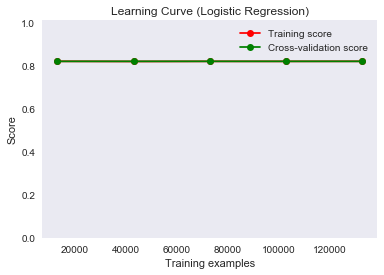

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#plotting the Decision Tree Learning Curve

title = "Learning Curve (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

#carrying over the Decision Tree Learning done prevously
estimator = dtree
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()



#plotting the KNN Learning Curve

title = "Learning Curve (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

#carrying over the KNN done prevously
estimator = knn
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()



#plotting the logistic Regression Curve

title = "Learning Curve (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

#carrying over the Logistic Regression done prevously
estimator = logit
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

# Selecting the best classification

### We have selected logistic Regression as the preferred classification method due to its higher scores, AUC, and the fact that it fits the model better

## Extrapolating the results to to other loan types

Although this will involve significant assumptions and extreme out - of - sample estimations, it will provide some interesting insights

### Extrapolating on Current Loans

In [100]:
#extracting only the 'Current Loans'
dfc= full_small[full_small.loan_status == 'Current']
dfc= dfc.dropna()
dfc.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050.0,0,10.99,885.46,7,1,1,1.067250,2,Current,...,0.0,0.804857,61.2,27.0,0.0,0.0,0.0,0.000000,0.816909,0.810242
42536,9750.0,0,13.98,333.14,17,9,5,1.058072,0,Current,...,0.0,0.785816,52.8,28.0,0.0,0.0,0.0,0.000000,0.793421,0.794271
42537,12000.0,0,6.62,368.45,18,1,0,1.074483,0,Current,...,0.0,0.792523,21.6,22.0,0.0,0.0,0.0,0.000000,0.824889,0.810453
42539,15000.0,0,8.90,476.30,35,8,0,1.068818,0,Current,...,0.0,0.790682,74.2,29.0,0.0,0.0,0.0,0.759649,0.825051,0.794519
42540,12000.0,0,11.99,398.52,11,1,0,1.076747,1,Current,...,0.0,0.789939,67.0,19.0,0.0,0.0,0.0,0.000000,0.826683,0.795156


In [101]:
#setting the target, and data
dfc_data = dfc.drop(['loan_status'] ,axis=1)
dfc_target = dfc['loan_status']

Xc = dfc_data
yc = dfc_target

# we cant train the the model, as the Current column has only one class - 'Current'. We will be directly using it to predict the 
# possibility of a current loan being classified as current or unpaid
yc_pred = logit.predict(Xc)

#printing out the results
print(Xc.shape)
results_current_class = np.unique(yc_pred, return_counts= True)
print(results_current_class)

(597945, 24)
(array([0, 1], dtype=int64), array([     2, 597943], dtype=int64))


### Extrapolating on Late and Default Loans

Here we will combine all late loan types (including grace period, late 16-30, late 31-120, default)

In [102]:
#extracting only the 'late' and 'default' Loans

dflt= full_small[(full_small.loan_status == 'Late (31-120 days)') | ((full_small.loan_status == 'Late (16-30 days)') | (full_small.loan_status == 'In Grace Period') | (full_small.loan_status == 'Default'))]
dflt= dflt.dropna()

# combining all late categories
dfly = dflt.loan_status = 0

dflt.info()
dflt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 42550 to 887345
Data columns (total 25 columns):
funded_amnt                   21175 non-null float64
term                          21175 non-null int64
int_rate                      21175 non-null float64
installment                   21175 non-null float64
sub_grade                     21175 non-null int64
emp_length                    21175 non-null int64
home_ownership                21175 non-null int64
annual_inc                    21175 non-null float64
verification_status           21175 non-null int64
loan_status                   21175 non-null int64
purpose                       21175 non-null int64
dti                           21175 non-null float64
delinq_2yrs                   21175 non-null float64
inq_last_6mths                21175 non-null float64
open_acc                      21175 non-null float64
pub_rec                       21175 non-null float64
revol_bal                     21175 non-null float64

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42550,8000.0,0,10.99,261.88,7,8,0,1.061094,0,0,...,1.0,0.784411,34.6,16.0,15.0,0.0,0.0,0.000000,0.794960,0.798236
42551,11500.0,1,22.90,323.54,28,3,5,1.061003,2,0,...,0.0,0.788903,70.9,17.0,0.0,0.0,0.0,0.691742,0.800308,0.793400
42570,14825.0,0,18.25,537.83,33,11,5,1.079805,2,0,...,1.0,0.789237,22.0,19.0,0.0,0.0,0.0,0.000000,0.811967,0.807532
42667,16000.0,1,19.22,416.99,8,4,0,1.074483,2,0,...,1.0,0.795306,72.5,38.0,0.0,0.0,0.0,0.000000,0.821678,0.799237
42704,14000.0,1,16.24,342.25,31,5,0,1.067867,2,0,...,1.0,0.781268,55.6,18.0,0.0,0.0,0.0,0.000000,0.824667,0.789432


In [103]:
#setting the target, and data
dflt_data = dflt.drop(['loan_status'] ,axis=1)
dflt_target = dflt['loan_status']

Xlt = dflt_data
ylt = dflt_target

# we cant train the the model, as the Current column has only one class - 'Current'. We will be directly using it to predict the 
# possibility of a current loan being classified as current or unpaid
ylt_pred = logit.predict(Xlt)

#printing out the results
print(Xlt.shape)
results_late_class = np.unique(ylt_pred, return_counts= True)
print(results_late_class)

(21175, 24)
(array([1], dtype=int64), array([21175], dtype=int64))


## Predicting what we can save on / the amount of default

This involves predictive numerical modelling on the percentage recovery from the charge-offs, and extrapolating them to our currently predicted(through classification). 

It will give us a numerical value to estimate the amount of charge offs we may encounter from current and late loans

calculating the percentage loan recovered in the each case

In [104]:
full2 =  pd.read_csv("C:\loan.csv", low_memory=False)

In [105]:
full2= full2.drop(['annual_inc_joint','application_type','collection_recovery_fee','dti_joint','initial_list_status','issue_d',
                'last_credit_pull_d','last_pymnt_d','next_pymnt_d','out_prncp','out_prncp_inv','policy_code','recoveries',
                'title','total_pymnt_inv','url','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                 'open_il_24m', 'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                 'all_util','inq_fi', 'total_cu_tl','inq_last_12m','addr_state','zip_code','emp_title','member_id','loan_amnt',
                'grade','desc','id','funded_amnt_inv','pymnt_plan','mths_since_last_record','total_pymnt',
                'total_rec_int','last_pymnt_amnt','earliest_cr_line','mths_since_last_delinq','mths_since_last_major_derog'],
                axis = 1)
print(full2.shape)
full2.head()

(887379, 26)


,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Fully Paid,...,13648.0,83.7,9.0,5000.00,0.00,0.0,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,1687.0,9.4,4.0,456.46,0.00,0.0,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,2956.0,98.5,10.0,2400.00,0.00,0.0,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,5598.0,21.0,37.0,10000.00,16.97,0.0,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Current,...,27783.0,53.9,38.0,2233.10,0.00,0.0,0.0,NaN,NaN,NaN


In [106]:
full2.shape
full2.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,Verified,Fully Paid,...,13648.0,83.7,9.0,5000.00,0.00,0.0,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,1687.0,9.4,4.0,456.46,0.00,0.0,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,2956.0,98.5,10.0,2400.00,0.00,0.0,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,5598.0,21.0,37.0,10000.00,16.97,0.0,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,Source Verified,Current,...,27783.0,53.9,38.0,2233.10,0.00,0.0,0.0,NaN,NaN,NaN


In [107]:
# converting text - based variables into categorical
term_dic= dict(zip(list(set(full2.term)),[1,0]))
full2['term']= full2['term'].map(term_dic)

hown_dic= dict(zip(list(set(full2.home_ownership)),[4,2,3,1,0,5]))
full2['home_ownership']= full2['home_ownership'].map(hown_dic)

vs_dic= dict(zip(list(set(full2.verification_status)),[0,2,1]))
full2['verification_status']= full2['verification_status'].map(vs_dic)

sg_dic= dict(zip(list(set(full2.sub_grade)),[26,34,11,24,12,1,14,32,15,9,30,19,10,33,20,22,17,16,18,29,13,35,3,2,6,4,8,25,27,28,
                                            23,21,31,5,7]))
full2['sub_grade']= full2['sub_grade'].map(sg_dic)

empl_dic= dict(zip(list(set(full2.emp_length)),[4,8,5,0,7,1,11,9,10,6,2,3]))
full2['emp_length']= full2['emp_length'].map(empl_dic)

purp_dic= dict(zip(list(set(full2.purpose)),list(range(0,14))))
full2['purpose']= full2['purpose'].map(purp_dic)

In [108]:
# computing the at risk proportion

full2['amount at risk'] = (full2['funded_amnt'] - full2['total_rec_prncp'])/ full2['funded_amnt']

full2 = full2.drop(['total_rec_prncp'], axis = 1)

full2.head()

,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,amount at risk
0,5000.0,0,10.65,162.87,7,1,5,24000.0,2,Fully Paid,...,13648.0,83.7,9.0,0.00,0.0,0.0,NaN,NaN,NaN,0.000000
1,2500.0,1,15.27,59.83,4,11,5,30000.0,1,Charged Off,...,1687.0,9.4,4.0,0.00,0.0,0.0,NaN,NaN,NaN,0.817416
2,2400.0,0,15.96,84.33,31,1,5,12252.0,0,Fully Paid,...,2956.0,98.5,10.0,0.00,0.0,0.0,NaN,NaN,NaN,0.000000
3,10000.0,0,13.49,339.31,17,1,5,49200.0,1,Fully Paid,...,5598.0,21.0,37.0,16.97,0.0,0.0,NaN,NaN,NaN,0.000000
4,3000.0,1,12.69,67.79,26,9,5,80000.0,1,Current,...,27783.0,53.9,38.0,0.00,0.0,0.0,NaN,NaN,NaN,0.255633


In [109]:
# transforming variables for better fit
full2.annual_inc= np.log(full2.annual_inc) + 1
full2.delinq_2yrs= np.sqrt(full2.delinq_2yrs)
full2.open_acc= np.sqrt(full2.open_acc)
full2.revol_bal= full2.revol_bal + 1
full2.revol_bal= np.log(full2.revol_bal)
full2.tot_coll_amt= full2.tot_coll_amt + 1
full2.tot_coll_amt= np.log(full2.tot_coll_amt)
full2.tot_cur_bal= full2.tot_cur_bal + 1
full2.tot_cur_bal= np.log(full2.tot_cur_bal)
full2.total_rev_hi_lim= full2.total_rev_hi_lim + 1
full2.total_rev_hi_lim= np.log(full2.total_rev_hi_lim)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


### we now have have a dataframe with the charged off loans and recovered amounts, to predict our at risk proportions

### Modelling

In [110]:
#extracting only the "Charged Off" Loans
dfchar= full2[(full2.loan_status == 'Charged Off')]
dfchar.loan_status.replace('Charged Off', 0,inplace=True)

full2 = full2.drop(['loan_status'], axis = 1)
dfchar= dfchar.dropna()
dfchar.shape

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(35206, 26)

In [111]:
#setting the target, and data
dfchar_data = dfchar.drop(['amount at risk'] ,axis=1)
dfchar_target = dfchar['amount at risk']

Xchar = dfchar_data
ychar = dfchar_target
print(Xchar.columns)
print(dfchar.shape)
Xchar.head()

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')
(35206, 26)


,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42563,10000.0,1,13.98,232.58,17,5,5,11.126631,1,0,...,0.0,8.593228,46.9,22.0,0.0,0.0,0.0,0.0,10.103158,9.350189
42593,15000.0,0,17.57,539.06,22,7,5,12.002100,0,0,...,0.0,8.919854,61.3,12.0,0.0,0.0,0.0,0.0,8.919854,9.409273
42619,28000.0,1,23.40,795.79,9,1,5,12.728037,1,0,...,3.0,10.225499,69.9,40.0,0.0,0.0,0.0,0.0,12.110431,10.584081
42620,13225.0,0,13.98,451.88,17,11,5,11.315332,0,0,...,1.0,9.857025,78.6,21.0,0.0,0.0,0.0,0.0,10.146865,10.098273
42631,23675.0,1,19.97,626.85,25,11,1,11.896739,1,0,...,0.0,10.026678,37.6,33.0,0.0,0.0,0.0,0.0,12.307469,11.003782


In [112]:
# Splitting into testing and training data

Xchar_train, Xchar_test, ychar_train, ychar_test = train_test_split(dfchar_data , dfchar_target, random_state=42, test_size = 0.3)

### Using a Decision Tree Regressor

Using Grid Search to iterate over and optimize the hyperparameters

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Find the max_depth that minimizes MSE
regTparameters = {'max_depth':range(4,12)}
gs_rt = GridSearchCV(DecisionTreeRegressor(), regTparameters, n_jobs=4)

gs_rt.fit(Xchar, ychar)

tree_model = gs_rt.best_estimator_
print (gs_rt.best_score_, gs_rt.best_params_) 

-0.0230359643918 {'max_depth': 8}


In [114]:
regtree = DecisionTreeRegressor(max_depth=8)
regtree.fit(Xchar_train, ychar_train)
regtree.fit(Xchar_train, ychar_train)
ychar_test_pred = regtree.predict(Xchar_test)
ychar_train_pred = regtree.predict(Xchar_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#printing out MSE, MAE and R2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(ychar_train, ychar_train_pred),
        mean_squared_error(ychar_test, ychar_test_pred)))
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(ychar_train, ychar_train_pred),
        mean_absolute_error(ychar_test, ychar_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(ychar_train, ychar_train_pred),
        r2_score(ychar_test, ychar_test_pred)))

In [ ]:
#importing pydot and graphviz export functions for visualization

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(Xchar.columns)
print(features)

# visualizing the tree
dot_data = StringIO()  

export_graphviz(regtree, out_file=dot_data,feature_names = features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  


In [ ]:
#extracting only the 'Current Loans'
#taking our 'Xc' example forward
Xc['classf'] = yc_pred

# creating datafame copy
dfcuroff = Xc

#taking only loans classifed as 'Charged Off'
dfcuroff= dfcuroff[(dfcuroff.classf == 1)]

#taking in our regression tree prediction function
# removing the classf column
dfcuroff.classf.drop

#predicting the values
ycuroff_pred = regtree.predict(dfcuroff)

#attaching the values to the dataframe
dfcuroff['amount at risk'] = ycuroff_pred

#calculating the value at risk
dfcuroff['value at risk'] = dfcuroff['funded_amnt'] * dfcuroff['amount at risk']

#calculate total value
riskv = dfcuroff['value at risk'].sum()


print('the total value (from current loans) at risk is :' , riskv)

In [ ]:
#extracting only the 'Current Loans'
#taking our 'Xc' example forward
Xlt['classf'] = ylt_pred

# creating datafame copy
dflateoff = Xlt

#taking only loans classifed as 'Charged Off'
dflateoff= dflateoff[(dflateoff.classf == 1)]

#taking in our regression tree prediction function
# removing the classf column
dflateoff.classf.drop

#predicting the values
ylateoff_pred = regtree.predict(dflateoff)

#attaching the values to the dataframe
dflateoff['amount at risk'] = ylateoff_pred

#calculating the value at risk
dflateoff['value at risk'] = dflateoff['funded_amnt'] * dflateoff['amount at risk']

#calculate total value
riskv = dflateoff['value at risk'].sum()


print('the total value (from current loans) at risk is :' , riskv)